# Week 10

In [1]:
import pandas as pd

df = pd.read_csv("marathon_results.csv")
df.head(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:02:39,02:09:17,00:04:56,1,1,1
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,01:47:59,02:02:42,02:09:48,00:04:58,2,2,2
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,01:47:59,02:03:27,02:10:49,00:05:00,5,5,5


In [2]:
df["tot_minutes"] = pd.to_timedelta(df["Finish"]).dt.total_seconds()/60
df.head(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:02:39,02:09:17,00:04:56,1,1,1,129.283333
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,01:47:59,02:02:42,02:09:48,00:04:58,2,2,2,129.800000
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3,130.366667
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4,130.783333
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,01:47:59,02:03:27,02:10:49,00:05:00,5,5,5,130.816667


Histogram of finish times:

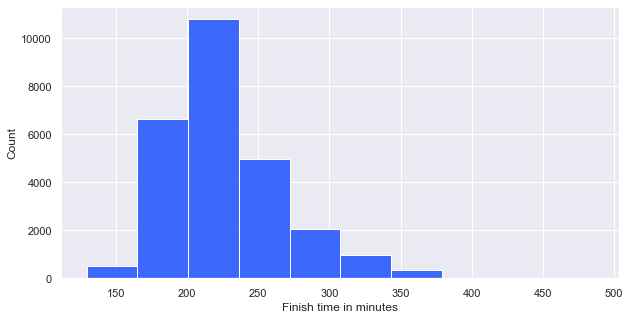

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=10)
plt.xlabel("Finish time in minutes");

In [4]:
import numpy as np
np.histogram(df["tot_minutes"], bins=10)

(array([  499,  6647, 10789,  4978,  2068,   969,   332,     8,     3,
            5]),
 array([129.28333333, 164.95666667, 200.63      , 236.30333333,
        271.97666667, 307.65      , 343.32333333, 378.99666667,
        414.67      , 450.34333333, 486.01666667]))

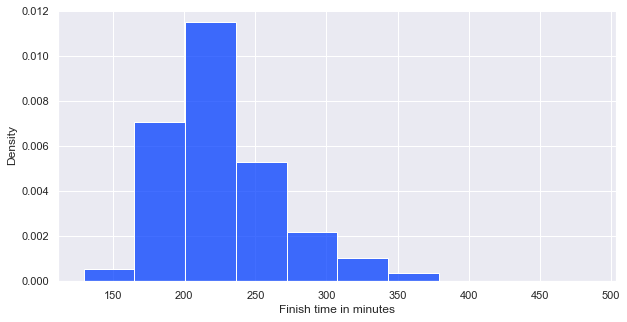

In [5]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=10, stat="density")
plt.xlabel("Finish time in minutes");

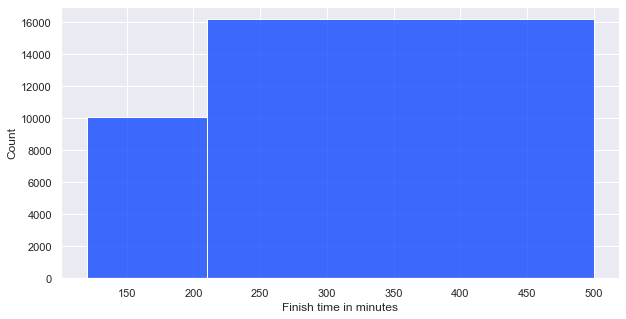

In [6]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=[120, 210, 500])
plt.xlabel("Finish time in minutes");

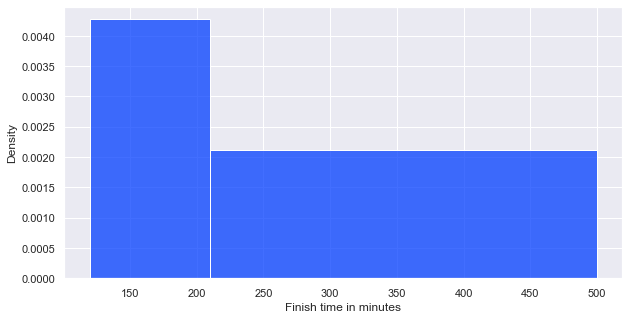

In [7]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=[120, 210, 500], stat="density")
plt.xlabel("Finish time in minutes");

## Dependence of a histogram on bin width and bin endpoints selection

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="darkgrid", palette="bright")

def hist(data, bins=10, shift=0):
    '''
    Plots a histogram of data.

    bins:
        number of bins
    shift:
        shift of bin boundaries.
    '''

    plt.figure(figsize=(12,4))
    max_shift = 5
    data = np.array(data)
    plt.xlim(data.min() - max_shift, data.max() + max_shift)
    sns.histplot(data,
                 stat="density",
                 bins=bins,
                 binrange =  (data.min() - max_shift + shift,
                               data.max() + max_shift + shift)
                )
    sns.rugplot(data, height=0.05, color='w')
    plt.show()


N = 50
rng = np.random.default_rng(10)
data = rng.normal(loc=10, scale=5, size=N)
interact(hist, shift=(0, 5, 0.25), bins=(1, 30, 1), data=fixed(data));

interactive(children=(IntSlider(value=10, description='bins', max=30, min=1), FloatSlider(value=0.0, descripti…

## Probability density function

$$P(a< x < b) = \int_a^b f(x)dx$$

## KDE with Gaussian kernels

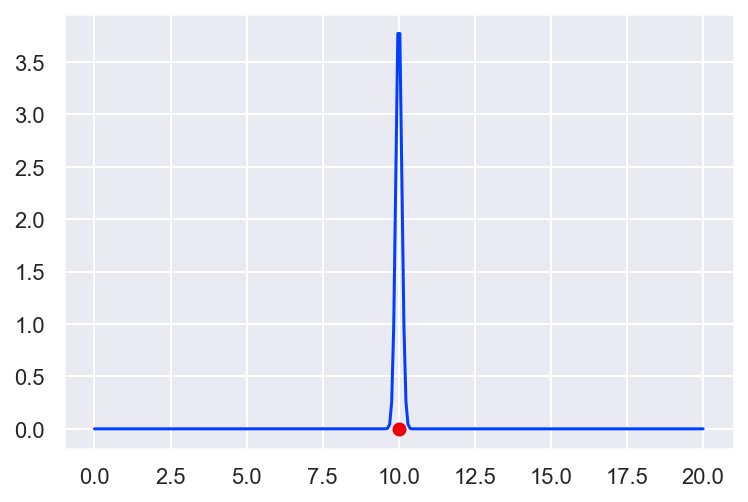

In [32]:
from scipy.stats import norm

X = 10
h = 0.1
x = np.linspace(0, 20, 300)
plt.plot(x, norm.pdf(x, loc=X, scale=h))
plt.plot(X, 0, 'ro');

In [16]:
from scipy.stats import norm

def kde(data, h, x):
    """
    Compute KDE of data with  Gaussian kernels

    x:
       KDE value will be computed for each value
       of this array.
    h:
       Kernel bandwidth
    """

    y = np.zeros_like(x)
    for X in data:
        y += norm.pdf(x, loc=X, scale=h)
    return y/len(data)


def plot_kde(data, h=0.1, show_kernels=False):
    """
    Plot KDE

    data:
        An array with data defining KDE.
    h:
        Kernel bandwidth.
    show_kernels:
        Boolean. If true, individual kernels are
        plotted too.
    """

    x = np.linspace(data.min() - 3, data.max() + 3, 400)
    plt.figure(figsize=(14,4))
    plt.plot(x, kde(data, h, x), lw=7, c='steelblue', alpha=0.4)
    plt.plot(data, [0]*len(data), 'r|', ms=15, mew=2)
    if show_kernels:
        for X in data:
            plt.plot(x, 1/len(data)*norm.pdf(x, loc=X, scale=h), 'r--', lw=0.7)

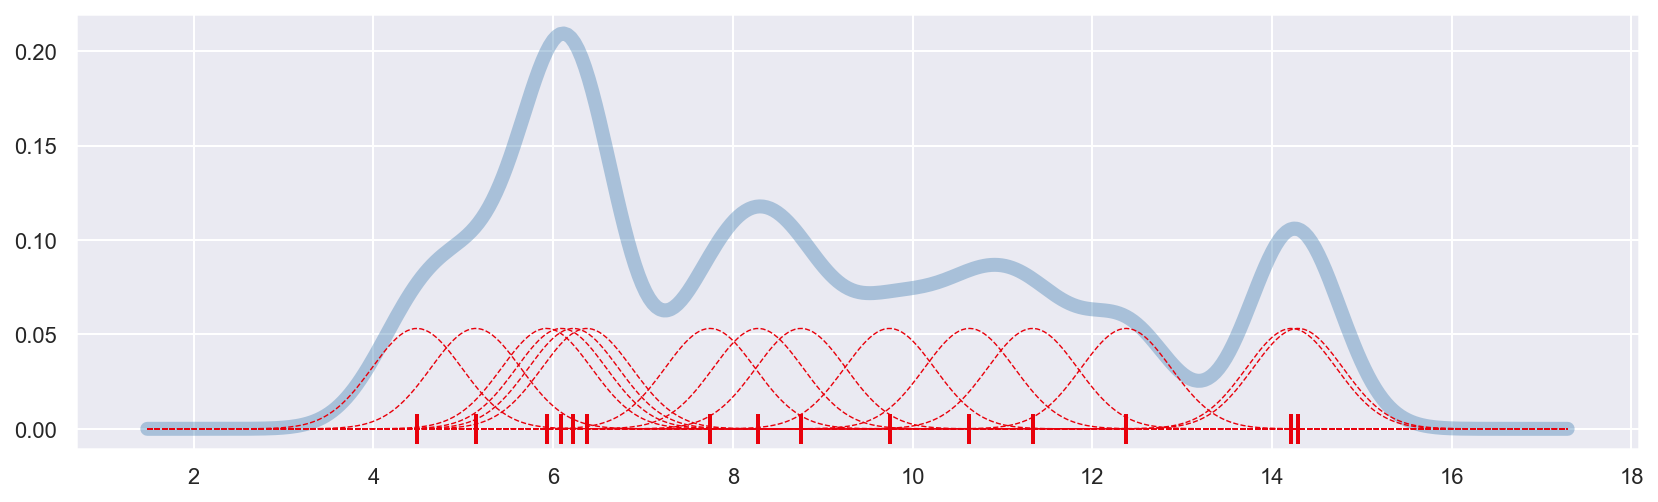

In [11]:
N = 15
rng = np.random.default_rng(10)
data = rng.normal(loc=10, scale=5, size=N)
plot_kde(data, h=0.5, show_kernels=True)

In [17]:
interact(plot_kde, data=fixed(data), h=(0.1, 4.0, 0.1), show_kernels=True);

interactive(children=(FloatSlider(value=0.1, description='h', max=4.0, min=0.1), Checkbox(value=True, descript…

## Gaussian KDE with SciPy 

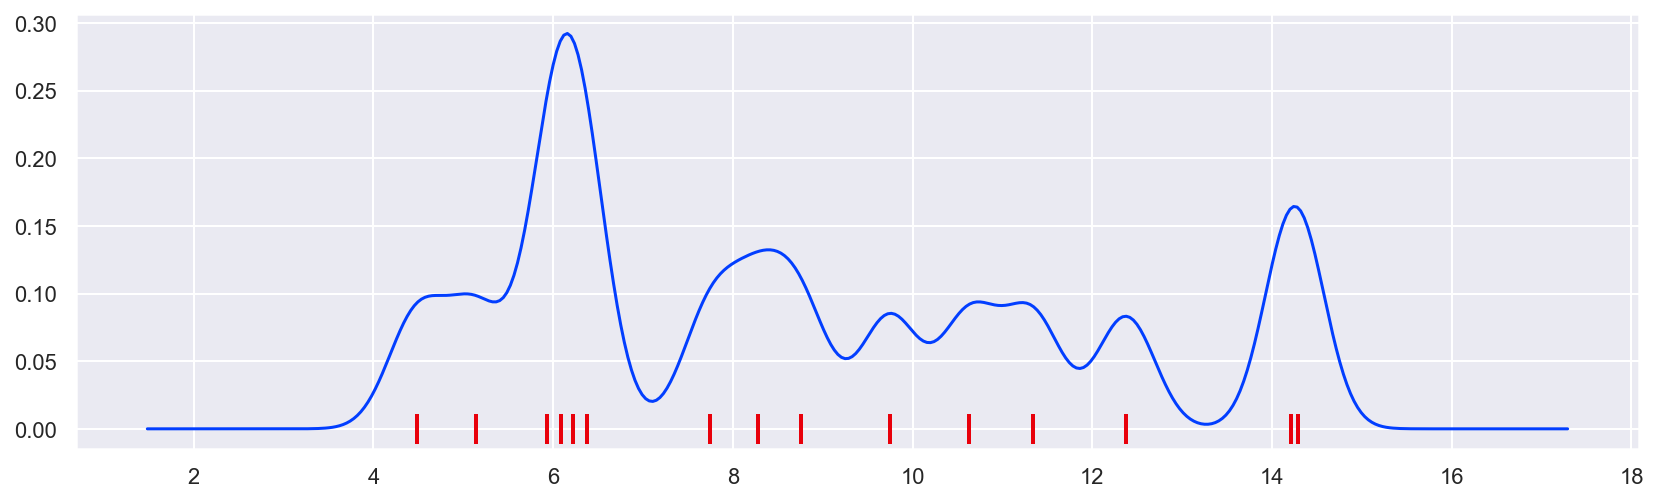

In [21]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(data, bw_method=0.1)

plt.figure(figsize=(14, 4))
plt.plot(data, [0]*len(data), 'r|', ms=15, mew=2)

x = np.linspace(data.min() - 3, data.max() + 3, 400)
plt.plot(x, kde(x));

In [22]:
kde(5)

array([0.09976728])

In [15]:
data.std()*0.4

1.241255036359153

In [23]:
kde.integrate_box(5, 10)

0.5687317616054238

In [24]:
from  scipy.stats import gaussian_kde

def integrate(data, lower=7, upper=12):
    """
    Plot integral of KDE

    data:
        An array with data defining KDE
    lower, upper:
        Limits of integration.
    """

    kde_data = gaussian_kde(data)
    integral = kde_data.integrate_box(lower, upper)
    xfill = np.linspace(lower, upper, 100)

    x_min = data.min() - 1
    x_max = data.max() + 1
    x = np.linspace(x_min, x_max, 400)

    plt.figure(figsize=(10, 5))
    plt.xlim(x_min - 1, x_max + 1)
    plt.title(f"$\int^{{{upper:.2f}}}_{{{lower:.2f}}}\ f(t)dt = {integral:.3f}$",
              fontsize=20,
              y=1.1)
    plt.plot(x, kde_data(x))
    if lower <= upper:
        plt.fill_between(xfill,
                         kde_data(xfill),
                         0,
                         color='steelblue',
                         alpha=0.3)
    plt.plot(data, [0] * len(data), 'r|', ms=15)


N = 50
rng = np.random.default_rng(10)
data = rng.normal(loc=10, scale=5, size=N)
interact(integrate,
         data=fixed(data),
         lower=(data.min() - 1, data.max() + 1, 0.2),
         upper=(data.min() - 1, data.max() + 1, 0.2));

interactive(children=(FloatSlider(value=7.0, description='lower', max=18.711520554978158, min=-0.3479861642085…

## KDE for marathon finish times

In [26]:
kde = gaussian_kde(df["tot_minutes"])

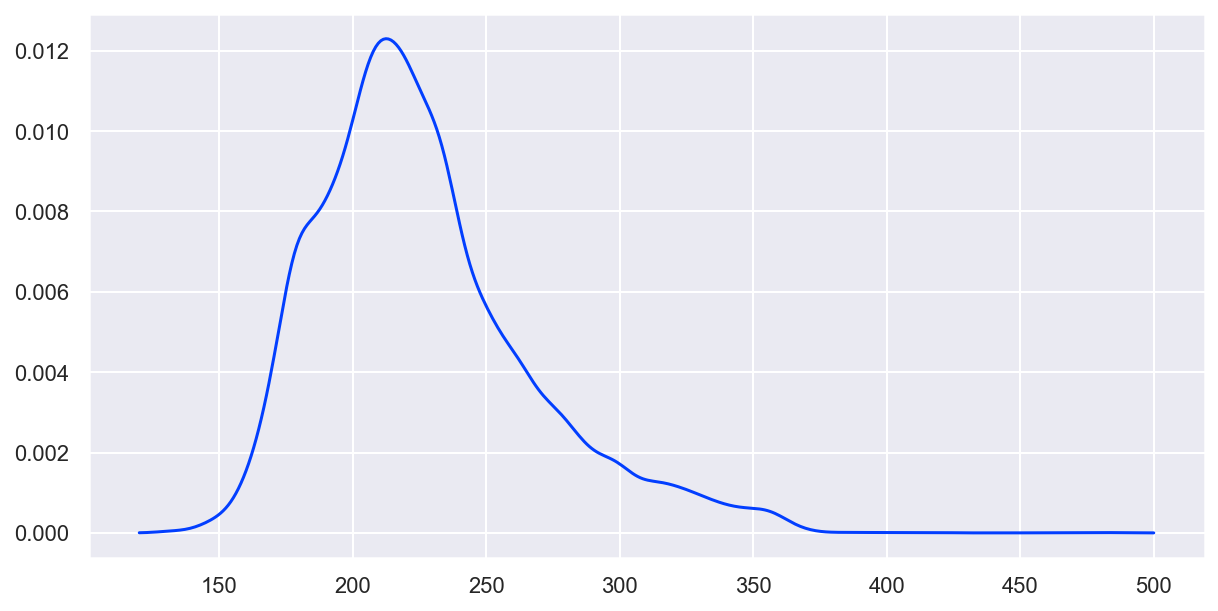

In [28]:
plt.figure(figsize=(10,5))
x = np.linspace(120, 500, 400)
plt.plot(x, kde(x));

In [30]:
kde.integrate_box(120, 150)

0.0036399955707045626

In [31]:
kde(180)

array([0.00732854])

## Predicting sex of runner based on finish time

In [34]:
dfm = df[df["M/F"] == "M"]
dfm.sample(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
18715,60,M,USA,00:26:33,00:53:15,01:20:09,01:47:49,01:54:01,02:16:11,02:48:35,03:19:45,03:48:04,03:59:47,00:09:09,18851,11299,467,239.783333
1941,26,M,USA,00:21:13,00:42:28,01:03:21,01:24:11,01:28:45,01:44:56,02:06:03,02:27:14,02:47:51,02:57:15,00:06:46,1944,1839,1426,177.250000
18319,51,M,USA,00:25:26,00:51:25,01:18:08,01:45:30,01:51:33,02:13:42,02:42:47,03:13:09,03:43:54,03:57:58,00:09:05,18447,11114,1638,237.966667
6687,46,M,AUS,00:21:49,00:43:30,01:05:22,01:27:41,01:32:34,01:50:11,02:13:54,02:39:02,03:05:55,03:18:50,00:07:36,6702,5744,881,198.833333
24938,58,M,USA,00:23:55,00:52:13,01:27:26,02:05:52,02:16:05,02:48:23,03:29:29,04:10:12,04:49:24,05:05:59,00:11:41,25188,13965,1427,305.983333


In [35]:
dff = df[df["M/F"] == "F"]
dff.sample(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
14459,47,F,CAN,00:24:49,00:49:04,01:13:26,01:38:28,01:43:56,02:04:16,02:31:40,03:00:51,03:30:07,03:43:37,00:08:32,14534,4935,481,223.616667
20857,48,F,USA,00:28:39,00:56:58,01:25:50,01:56:00,02:01:55,02:24:29,02:55:58,03:27:12,03:59:08,04:13:27,00:09:40,21023,8899,1416,253.450000
9640,33,F,GER,00:23:53,00:47:34,01:11:20,01:35:14,01:40:29,01:59:05,02:23:52,02:49:49,03:16:05,03:28:40,00:07:58,9669,2176,1742,208.666667
24444,66,F,CAN,00:32:44,01:06:21,01:38:32,02:13:00,02:20:17,02:47:24,03:23:39,04:01:26,04:39:00,04:55:26,00:11:17,24684,10929,60,295.433333
7979,26,F,USA,00:24:31,00:48:26,01:12:05,01:35:52,01:41:05,01:59:55,02:24:44,02:49:20,03:13:19,03:23:30,00:07:46,7999,1445,1201,203.500000


In [37]:
kdem = gaussian_kde(dfm["tot_minutes"])
kdef = gaussian_kde(dff["tot_minutes"])

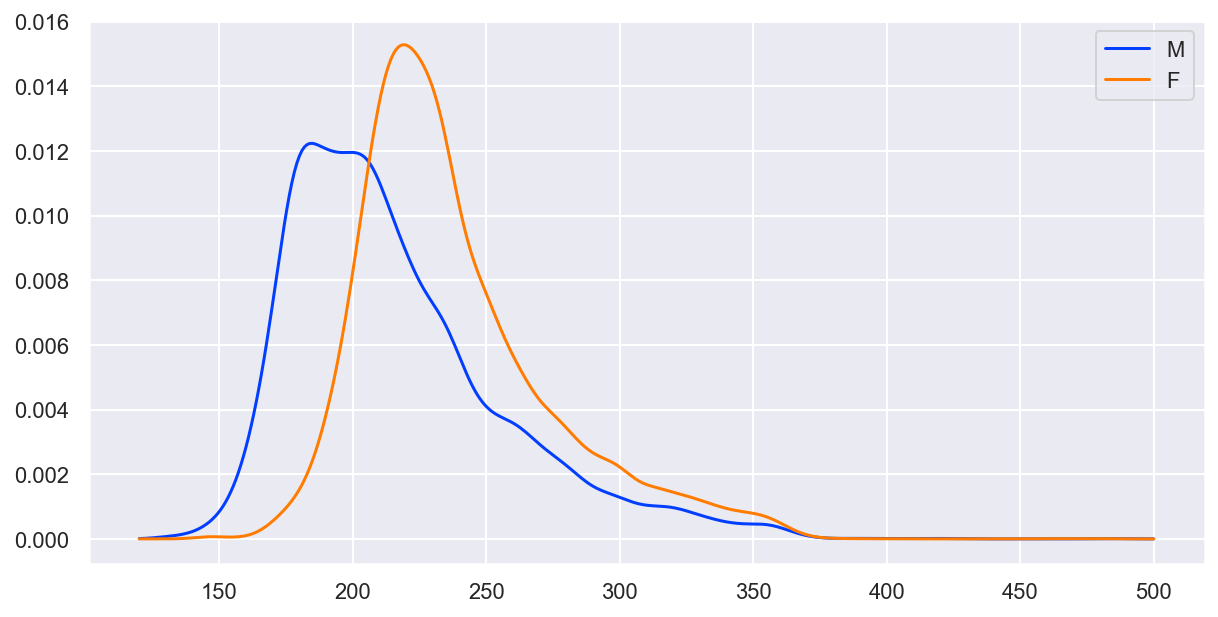

In [38]:
plt.figure(figsize=(10, 5))

x = np.linspace(120, 500, 400)
plt.plot(x, kdem(x), label="M")
plt.plot(x, kdef(x), label="F")
plt.legend()
plt.show()

In [39]:
kdem.integrate_box(120, 150)

0.0064700780861402215

In [40]:
kdef.integrate_box(120, 150)

0.0006920390401936639

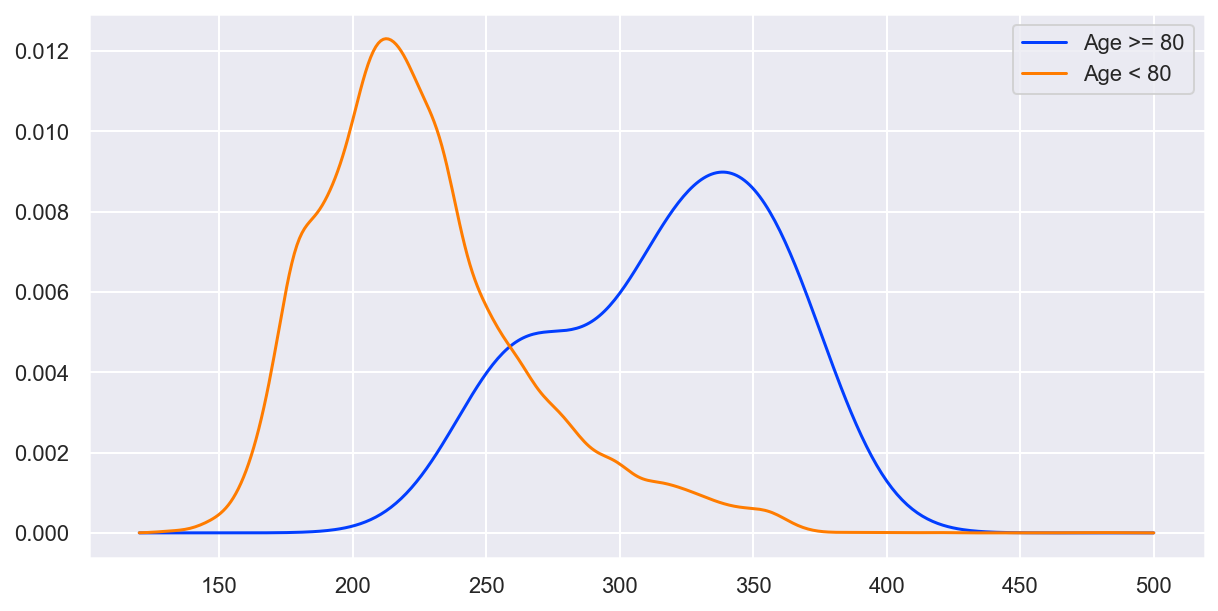

In [43]:
gt80 = df[df["Age"] >= 80]
lt80 = df[df["Age"] < 80]

kde_gt80 = gaussian_kde(gt80["tot_minutes"])
kde_lt80 = gaussian_kde(lt80["tot_minutes"])

plt.figure(figsize=(10, 5))

x = np.linspace(120, 500, 400)
plt.plot(x, kde_gt80(x), label="Age >= 80")
plt.plot(x, kde_lt80(x), label="Age < 80")
plt.legend()
plt.show()

In [44]:
gt80

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
21445,82,M,USA,00:28:17,00:56:47,01:25:21,01:55:29,02:02:04,02:26:15,02:58:08,03:31:53,04:04:23,04:18:00,00:09:51,21626,12387,1,258.000000
22075,80,M,USA,00:28:01,00:54:50,01:21:32,01:50:24,01:56:26,02:18:29,02:49:29,03:24:29,04:05:33,04:23:13,00:10:03,22268,12682,2,263.216667
22448,81,M,USA,00:28:56,00:58:11,01:28:20,01:59:24,02:06:14,02:31:07,03:04:02,03:37:42,04:11:24,04:26:49,00:10:11,22646,12841,3,266.816667
25189,80,M,USA,00:34:57,01:13:19,01:49:37,02:27:17,02:35:20,03:05:29,03:43:12,04:22:43,04:58:14,05:13:37,00:11:58,25446,14072,4,313.616667
25422,81,M,USA,00:35:35,01:12:16,01:48:45,02:26:31,02:34:48,03:04:55,03:44:07,04:23:28,05:03:44,05:20:49,00:12:15,25686,14185,5,320.816667
25428,82,M,USA,00:33:32,01:07:54,01:43:43,02:20:34,02:29:08,02:59:01,03:38:37,04:21:04,05:02:35,05:20:55,00:12:15,25692,14188,6,320.916667
25574,80,M,USA,00:31:50,01:06:35,01:44:29,02:25:14,02:32:52,03:03:07,03:47:42,04:29:57,05:08:14,05:25:57,00:12:26,25843,14258,7,325.950000
26119,82,F,USA,00:36:54,01:14:34,01:54:54,02:36:39,02:45:42,03:18:39,04:04:44,04:49:32,05:33:24,05:53:40,00:13:30,26411,11923,1,353.666667
26168,80,M,USA,00:33:33,01:07:16,01:41:45,02:16:24,02:23:47,02:53:16,03:39:35,04:36:43,05:33:05,05:56:24,00:13:36,26461,14512,8,356.400000
26193,82,M,USA,00:36:38,01:14:17,01:53:57,02:36:49,02:46:08,03:19:46,04:05:06,04:51:33,05:38:06,05:57:54,00:13:40,26488,14527,9,357.900000


In [45]:
len(df[(df["tot_minutes"] > 270) & (df["tot_minutes"] < 400)])

3549

In [46]:
train_frac = 0.5

train_df = df.sample(frac=train_frac).copy()
train_df

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
355,25,M,USA,00:18:19,00:36:18,00:54:28,01:12:38,01:16:35,01:30:51,01:49:56,02:10:07,02:31:42,02:41:55,00:06:11,356,340,313,161.916667
10885,55,M,PAN,00:23:48,00:47:29,01:11:15,01:35:40,01:40:54,02:00:15,02:26:38,02:53:42,03:20:31,03:32:26,00:08:07,10922,8103,416,212.433333
24408,62,M,USA,00:26:14,00:52:49,01:22:27,01:54:09,02:01:04,02:26:44,03:03:51,03:45:07,04:33:51,04:54:41,00:11:15,24647,13743,822,294.683333
6246,45,M,USA,00:21:48,00:43:11,01:04:40,01:26:35,01:31:20,01:49:07,02:13:29,02:40:34,03:06:15,03:17:07,00:07:32,6261,5442,784,197.116667
9550,41,M,SUI,00:25:37,00:49:00,01:12:24,01:36:23,01:41:31,02:00:29,02:25:41,02:51:25,03:17:05,03:28:27,00:07:58,9579,7446,1351,208.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,57,F,CAN,00:28:27,00:56:46,01:25:39,01:56:01,02:02:31,02:27:08,03:00:08,03:35:33,04:09:32,04:25:30,00:10:08,22522,9735,449,265.500000
14931,55,M,USA,00:25:44,00:51:11,01:16:40,01:42:02,01:47:37,02:07:38,02:34:48,03:03:29,03:31:28,03:45:14,00:08:36,15010,9790,811,225.233333
341,25,M,USA,00:18:51,00:37:29,00:56:27,01:15:27,01:19:34,01:34:20,01:53:34,02:13:04,02:32:51,02:41:37,00:06:10,342,326,300,161.616667
18871,47,F,CAN,00:27:29,00:54:59,01:23:30,01:52:39,01:58:52,02:21:24,02:50:57,03:20:45,03:48:37,04:00:42,00:09:11,19007,7642,1137,240.700000


In [47]:
test_df = df.drop(train_df.index).copy()
test_df

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3,130.366667
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4,130.783333
5,30,M,KEN,00:14:44,00:29:45,00:44:59,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:18,02:10:52,00:05:00,6,6,6,130.866667
6,32,M,USA,00:14:45,00:29:45,00:45:20,01:00:43,01:04:03,01:16:05,01:31:59,01:48:06,02:04:05,02:11:20,00:05:01,7,7,7,131.333333
7,39,M,USA,00:14:44,00:29:44,00:44:59,01:00:30,01:04:02,01:16:07,01:31:59,01:47:59,02:04:58,02:12:42,00:05:04,8,8,8,132.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26292,37,M,USA,00:37:58,01:22:18,02:10:02,03:01:58,03:12:16,03:56:09,04:52:52,05:48:49,06:40:30,07:00:30,00:16:03,26593,14579,4964,420.500000
26293,64,F,USA,00:50:15,01:43:31,02:36:53,03:32:26,03:43:46,04:25:53,05:19:44,06:17:19,07:13:34,07:38:56,00:17:31,26594,12015,269,458.933333
26294,61,F,USA,00:48:36,01:39:39,02:39:13,03:35:58,03:47:55,04:32:44,05:31:58,06:28:56,07:26:19,07:51:30,00:17:59,26595,12016,270,471.500000
26296,53,M,USA,00:49:04,01:40:12,02:33:31,03:31:41,03:43:35,04:29:20,05:31:11,06:33:35,07:35:38,08:00:37,00:18:20,26597,14580,2055,480.616667


In [50]:
train_dfm = train_df[train_df["M/F"] == "M"]
train_dff = train_df[train_df["M/F"] == "F"]

kdem = gaussian_kde(train_dfm["tot_minutes"])
kdef = gaussian_kde(train_dff["tot_minutes"])

mc = len(train_dfm)
fc = len(train_dff)

prob_f = fc/(fc+mc)
prob_m = mc/(fc+mc)

def predictor_f(t):
    return (kdef(t)*prob_f)/(kdef(t)*prob_f + kdem(t)*prob_m)

In [52]:
predictor_f(130)

array([0.02360128])

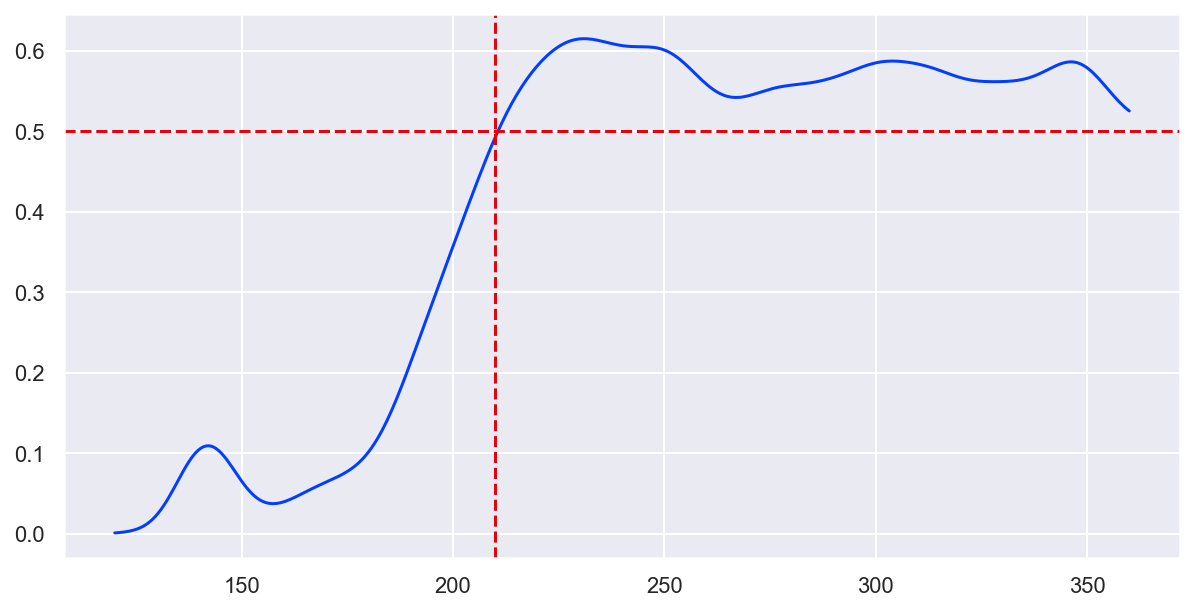

In [55]:
x = np.linspace(120, 360, 400)
plt.figure(figsize=(10, 5))
plt.plot(x, predictor_f(x))
plt.axhline(0.5, ls="--", c='r')
plt.axvline(210, ls="--", c='r')

In [57]:
test_df["prob_F"] = predictor_f(test_df["tot_minutes"])
test_df

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes,prob_F
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3,130.366667,0.025942
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4,130.783333,0.028786
5,30,M,KEN,00:14:44,00:29:45,00:44:59,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:18,02:10:52,00:05:00,6,6,6,130.866667,0.029378
6,32,M,USA,00:14:45,00:29:45,00:45:20,01:00:43,01:04:03,01:16:05,01:31:59,01:48:06,02:04:05,02:11:20,00:05:01,7,7,7,131.333333,0.032833
7,39,M,USA,00:14:44,00:29:44,00:44:59,01:00:30,01:04:02,01:16:07,01:31:59,01:47:59,02:04:58,02:12:42,00:05:04,8,8,8,132.700000,0.044203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26292,37,M,USA,00:37:58,01:22:18,02:10:02,03:01:58,03:12:16,03:56:09,04:52:52,05:48:49,06:40:30,07:00:30,00:16:03,26593,14579,4964,420.500000,0.000001
26293,64,F,USA,00:50:15,01:43:31,02:36:53,03:32:26,03:43:46,04:25:53,05:19:44,06:17:19,07:13:34,07:38:56,00:17:31,26594,12015,269,458.933333,0.999997
26294,61,F,USA,00:48:36,01:39:39,02:39:13,03:35:58,03:47:55,04:32:44,05:31:58,06:28:56,07:26:19,07:51:30,00:17:59,26595,12016,270,471.500000,1.000000
26296,53,M,USA,00:49:04,01:40:12,02:33:31,03:31:41,03:43:35,04:29:20,05:31:11,06:33:35,07:35:38,08:00:37,00:18:20,26597,14580,2055,480.616667,1.000000


In [61]:
sum((test_df["prob_F"] >= 0.5) == (test_df["M/F"] == "F"))/len(test_df)

0.6525211042664841

In [62]:
test_df[test_df["prob_F"] < 0.3]["M/F"].value_counts()

M    2593
F     368
Name: M/F, dtype: int64

In [63]:
test_df[test_df["prob_F"] > 0.7]["M/F"].value_counts()

F    2
M    2
Name: M/F, dtype: int64